#### House Price Prediction using LinearRegression, Ridge and Lasso

In [60]:
import pandas as pd
import numpy as np
from skimpy import skim
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [61]:
df = pd.read_csv('C:\\Users\\harip\\Desktop\\Datascience\\data\\BostonHousing.csv')
df.shape

(506, 14)

In [62]:
# skim(df)

In [63]:
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


Renaming col and Inspecting the data

In [64]:
df.head(3)
df.rename({'medv' : 'price'},axis=1,inplace=True)
df.head(2)
# here my dependent value is price

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


Finding out correlations

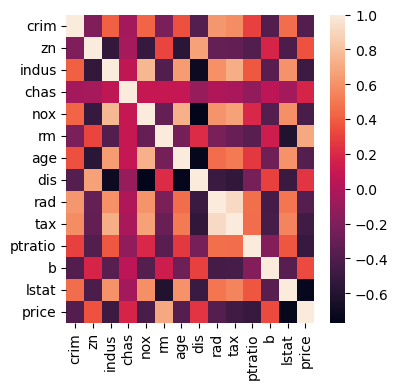

In [65]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (4,4)
sns.heatmap(df.corr())
plt.show()

Checking for null values

In [66]:
df.isna().sum() # no null values , im also not checking the outliers 

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

Checking for outliers

In [67]:
# import matplotlib
# matplotlib.rcParams['figure.figsize'] = (10,8)
# sns.boxplot(df) # there is a ton of outlier's

In [68]:
df.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


Independenet and Dependent variable

In [69]:
# X : take all rows and all cols except the last , Price is our dependent variable
X = df.iloc[:,:-1]
# y : take all rows and only the last row , Price is dependent variable
y = df.iloc[:,-1]

In [70]:
# Independet value must always be in Dataframe , Independent values can be in serues or 1-d array
print(f"X : {type(X)}, y : {type(y)}")

X : <class 'pandas.core.frame.DataFrame'>, y : <class 'pandas.core.series.Series'>


### For a Quick check on the accuracy of your model 
1. Your MODEL CAN BE ANYTHING  : REGRESSION OR CLASSIFICATION
* You can do by importing a Cross_val_score from sklearn.model_selection
* Observation : Feature Scaling is not done

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
absoulute_cvs = cross_val_score(lr,X,y,scoring="neg_mean_absolute_error",cv = 5)
squared_cvs = cross_val_score(lr,X,y,scoring="neg_mean_squared_error",cv = 5)
acvs = (np.mean(absoulute_cvs))
scvs = (np.mean(squared_cvs))
print(f"Mean Absolute Error : {acvs}, Mean Squared Erro : {scvs}")
print(f"Mean Absolute Error : {abs(acvs)}, Mean Squared Erro : {abs(scvs)}")
# The mean values , of acvs,scvs must close to zero 

Mean Absolute Error : -4.24996854419252, Mean Squared Erro : -37.13180746769901
Mean Absolute Error : 4.24996854419252, Mean Squared Erro : 37.13180746769901


RIDGE AND LASSO
* TO OVERCOME THE OVERFITTING 

In [72]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [73]:
ridge_model = Ridge()
lasso_model = Lasso()
hyper_params = {'alpha' : [1e-01,1e-10,1e-15,1e-08,1e-10,1,5,10,15,20,25,30,35,40,50,45,18,100,89]}

#### Ridge

In [74]:
# Passing model parameter's : Ridge
ridge_mod = GridSearchCV(ridge_model,hyper_params,scoring='neg_mean_squared_error',cv = 10)
# Training Model
ridge_mod.fit(X,y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1e-10, 1e-15, 1e-08, 1e-10, 1, 5, 10,
                                   15, 20, 25, 30, 35, 40, 50, 45, 18, 100,
                                   89]},
             scoring='neg_mean_squared_error')

In [75]:
# print(ridge_gridsearch)
print(ridge_mod.best_params_)
print(ridge_mod.best_score_)

{'alpha': 100}
-29.615220097335133


#### Lasso

In [76]:
# Passing model's Parameters : Lasso
lasso_mod = GridSearchCV(lasso_model,hyper_params,scoring="neg_mean_squared_error",cv=10)
# Training Model
lasso_mod.fit(X,y)

c:\Users\harip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.305e+03, tolerance: 4.070e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\harip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.131e+03, tolerance: 4.117e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\harip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.711e+03, toleranc

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1e-10, 1e-15, 1e-08, 1e-10, 1, 5, 10,
                                   15, 20, 25, 30, 35, 40, 50, 45, 18, 100,
                                   89]},
             scoring='neg_mean_squared_error')

In [77]:
print(lasso_mod.best_params_)
print(lasso_mod.best_score_)

{'alpha': 0.1}
-34.17996192308158


#### Linear Regression without scaling and splitting

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [79]:
r2 = r2_score(y,lr.predict(X))
print(r2)
# model is trained on the seen data so 
mse = mean_squared_error(y,lr.predict(X))
print(mse)

0.7406426641094095
21.8948311817292


#### ALL the techniques with scaling & Splitting

In [80]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=143)
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

X_train : (354, 13), X_test : (152, 13), y_train : (354,), y_test : (152,)


#### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lr = LinearRegression() 
# Scaling  the model
X_train = scaler.fit_transform(X_train)
# transform only ,avoid data leakage, uses mean and sd from fit_transform
X_test = scaler.transform(X_test)
# Training the model
lr.fit(X_train,y_train)
lr.predict(X_test)
# Metrics Error
r2_score = r2_score(y_test,lr.predict(X_test))
mse = mean_squared_error(y_test,lr.predict(X_test))
mae = mean_absolute_error(y_test,lr.predict(X_test))
# ===================================================================================== #
# printing all the values 
print(f"r2_score : {r2_score}, MSE : {mse}, MAE : {mae}")
# Again outiers is not removed and the error rate must be close to zero

r2_score : 0.661096459598446, MSE : 34.26920254961339, MAE : 3.800981227437905


#### Ridge and Lasso Applying the Scaling

In [82]:
model_ridge = Ridge()
model_lasso = Lasso()
# from doing this we can remove the bias : Overfitting and also lasso helps in best feature selection
# we have the Train , Test Split we just need to pass the X_train and Y_train in model fit 

##### Ridge

In [83]:
# Using the same Param score as hyper_params
rm = GridSearchCV(model_ridge,hyper_params,scoring='neg_mean_squared_error',cv = 10)
# building a model for fitting X_train , y_train data
rm.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1e-10, 1e-15, 1e-08, 1e-10, 1, 5, 10,
                                   15, 20, 25, 30, 35, 40, 50, 45, 18, 100,
                                   89]},
             scoring='neg_mean_squared_error')

In [84]:
# Checking the best parameter and the best scoring 
print(rm.best_params_)
print(rm.best_score_)

{'alpha': 5}
-19.991751507965215


Since this is already giving me the error we can use the r2 to see how our model is performing

In [85]:
from sklearn.metrics import r2_score
y_pred = rm.predict(X_test)
r_accuracy = r2_score(y_test,y_pred)
print(r_accuracy) # descent, but model is still under-performing

0.6559473092548076


##### Lasso

In [86]:
# Adding the feature to the model
lm = GridSearchCV(model_lasso,hyper_params,scoring='neg_mean_squared_error',cv = 15)
# training the model 
lm.fit(X_train,y_train)

c:\Users\harip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.420e+01, tolerance: 2.540e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\harip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.147e+02, tolerance: 2.394e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\harip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.882e+02, toleranc

GridSearchCV(cv=15, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1e-10, 1e-15, 1e-08, 1e-10, 1, 5, 10,
                                   15, 20, 25, 30, 35, 40, 50, 45, 18, 100,
                                   89]},
             scoring='neg_mean_squared_error')

In [87]:
# lets see the best parameter and score
print(lm.best_params_)
print(lm.best_score_)

{'alpha': 1e-08}
-20.305307332083828


In [88]:
# lests see the accuracy 
from sklearn.metrics import r2_score
y_pred = lm.predict(X_test)
r_accuracy = r2_score(y_test,y_pred)
print(r_accuracy)

0.6610964571849369
